In [1]:
from astropy.io import fits
from astropy import units as u
import asdf
from jwst import datamodels

In [2]:
import timeit
import numpy as np

Test:

- open file
- read data array # 14
- close file

The above operations are run 100 times. The plots show the mean of the 100 runs.


FITS file (`nrs20.fits`):

It was created by adding 23 more `SCI` ImageHDUs- all a copy of the original `SCI` extension.

ASDF file (`nrs20.asdf`):

The same number of arrays was added to the ASDF tree of `nrs.asdf`.

Datamodels file (`nrs20.fits`):

The `nrs20.fits` file was read in as a datamodels.MultiSlitModel.

ASDF MultiSlit file (`nrslong_ms.asdf`):

The MultiSlitModel was written out as an ASDF file.


In [3]:
t = timeit.Timer("f=fits.open('nrs20.fits'); f[14].data; f.close()", setup="from astropy.io import fits")
tfits = t.repeat(100, 1)

In [4]:
t = timeit.Timer("fa=asdf.open('nrs20.asdf'); fa.tree['data14']; fa.close()", setup="import asdf")
tasdf = t.repeat(100, 1)

In [5]:
t = timeit.Timer("fa=asdf.open('nrslong_ms.asdf'); fa.tree['slits'][14]['data']; fa.close()", setup="import asdf")
tasdf_mulitslit = t.repeat(100, 1)

In [6]:
t = timeit.Timer("im=datamodels.MultiSlitModel('nrs20.fits'); im.slits[14].data; im.close()", setup="from jwst import datamodels")
tdatamodels = t.repeat(100, 1)

In [9]:
fits_mean = np.array(tfits).mean()
asdf_mean = np.array(tasdf).mean()
datamodels_mean = np.array(tdatamodels).mean()
multislit_mean = np.array(tasdf_mulitslit).mean()

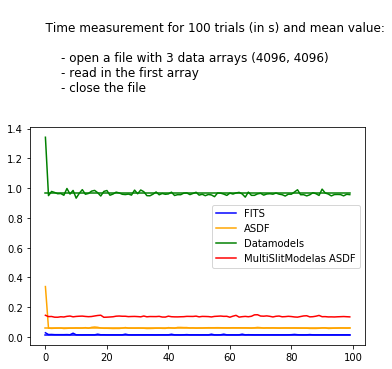

In [11]:
from matplotlib import pyplot as plt

plt.plot(tfits, color='b')
plt.plot([fits_mean]*100, color='b', label='FITS')
plt.plot(tasdf, color='orange')
plt.plot([asdf_mean]*100, color='orange', label="ASDF")
plt.plot(tdatamodels, color='green')
plt.plot([datamodels_mean]*100, color='green', label="Datamodels")
plt.plot(tasdf_mulitslit, color='red', label="MultiSlitModelas ASDF")
plt.plot(multislit_mean, color='red')
plt.legend()
title = """
    Time measurement for 100 trials (in s) and mean value:
    
        - open a file with 3 data arrays (4096, 4096)
        - read in the first array
        - close the file
        
    """
title= plt.title(title, loc='left')
plt.ylabel = "Time, ms"
plt.xlabel = "Trial"

<BarContainer object of 4 artists>

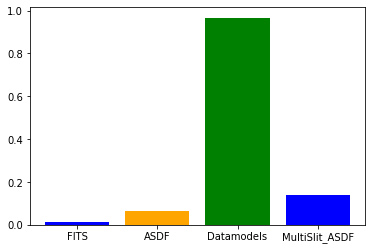

In [12]:
plt.bar([1, 2, 3, 4], [fits_mean, asdf_mean, datamodels_mean, multislit_mean], 
        color=['blue', 'orange', 'green'], 
        tick_label=['FITS', 'ASDF', 'Datamodels', 'MultiSlit_ASDF'])